In [1]:
import pandas as pd 
data=pd.read_csv('air_data.csv',encoding='GB18030')
data.shape

(62988, 44)

In [2]:
# include：包含哪类数据。默认只包含连续值，不包含离散值；include = ‘all’ 设置全部类型
# percentiles：设置输出的百分位数，默认为[.25,.50,.75]，返回第25，50，75百分位数
# 这里percentiles=[] 只输出50百分位数（中位数）,T 表示转置

#查看空值情况
look=data.describe(percentiles=[],include='all').T
look['null']=len(data)-look['count']
look=look[['null','max','min']]
look.columns=['空值数','最大值','最小值']
# look.to_csv('look.csv',encoding='gb18030')

look

,空值数,最大值,最小值
MEMBER_NO,0.0,62988.0,1.0
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0.0,6.0,4.0
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420.0,110.0,6.0
LOAD_TIME,0,NaN,NaN


In [3]:
# 客户特征分析
# 去除性别和年龄为空的数据
mydata=data[data['GENDER'].notnull()&data['AGE'].notnull()]
# user_basic_info=mydata[['FFP_DATE','GENDER','FFP_TIER','AGE']]
# for i in user_basic_info.index:
#     row=user_basic_info.loc[i,['FFP_DATE']]
#     ffp_data=str(row).split('/')[0].split()[1]
#     user_basic_info.loc[i,['FFP_DATE']]=ffp_data
# user_basic_info.to_csv('user_basic_info.csv',encoding='gb18030')
user_basic_info=pd.read_csv('user_basic_info.csv',encoding='gb18030')

user_basic_info.head()

,Unnamed: 0,FFP_DATE,GENDER,FFP_TIER,AGE
0,0,2006,男,6,31.0
1,1,2007,男,6,42.0
2,2,2007,男,6,40.0
3,3,2008,男,5,64.0
4,4,2009,男,6,48.0


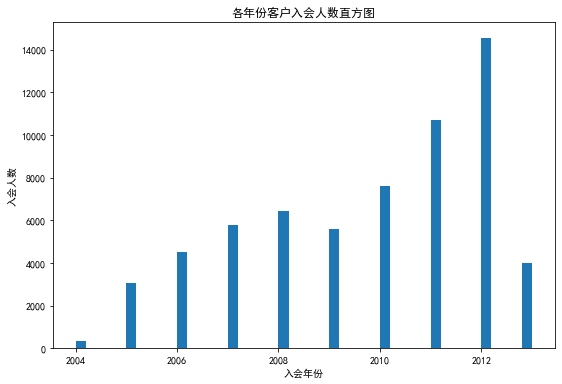

In [4]:
#（1）客户基本信息的分布分析（如客户入会时间、性别、会员卡级别和年龄）
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x1=user_basic_info['FFP_DATE']
plt.figure(figsize=(9,6))
plt.hist(sorted(x1),bins='auto')#bins: 直方图的柱数，即要分的组数，默认为10
plt.xlabel('入会年份')
plt.ylabel('入会人数')
plt.title("各年份客户入会人数直方图")
plt.show()
plt.close()

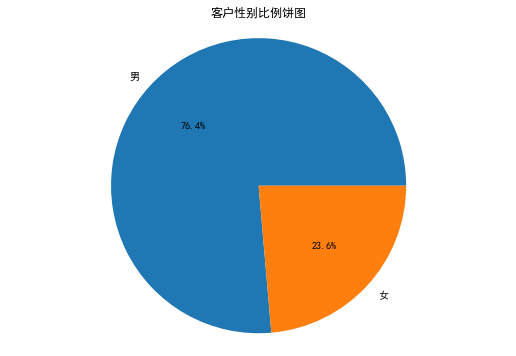

In [5]:
x2=user_basic_info['GENDER']
man=pd.value_counts(x2)['男']
woman=pd.value_counts(x2)['女']
plt.figure(figsize=(9,6))
plt.pie([man,woman],labels=['男','女'],autopct='%1.1f%%')
plt.title("客户性别比例饼图")
plt.axis('equal')
plt.show()
plt.close()

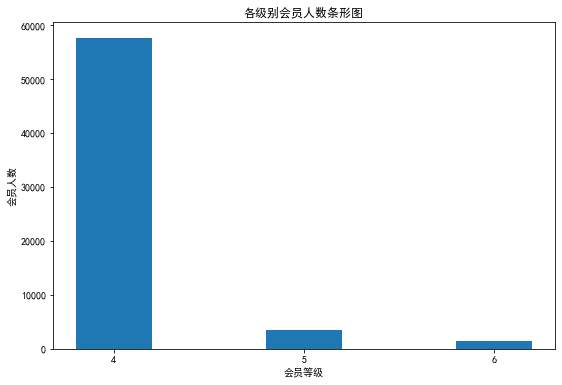

In [6]:
x3=user_basic_info['FFP_TIER']
h4=pd.value_counts(x3)[4]
h5=pd.value_counts(x3)[5]
h6=pd.value_counts(x3)[6]
plt.figure(figsize=(9,6))
plt.bar(x=range(3),height=[h4,h5,h6],width=0.4)
plt.xticks([0,1,2],['4','5','6'])#给x轴的坐标添加对应的标签
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title("各级别会员人数条形图")
plt.show()
plt.close()

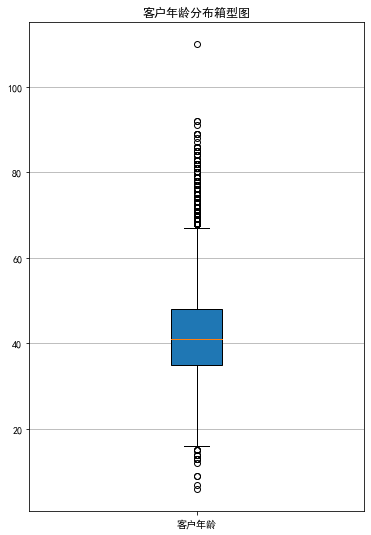

In [7]:
x4=user_basic_info['AGE']
plt.figure(figsize=(6,9))
# patch_artist：是否填充箱体的颜色
# boxprops：设置箱体的属性，如边框色，填充色等
plt.boxplot(x4,labels=['客户年龄'],patch_artist=True)
plt.grid(axis='y')#显示y坐标轴的底线
plt.title('客户年龄分布箱型图')
plt.show()
plt.close()

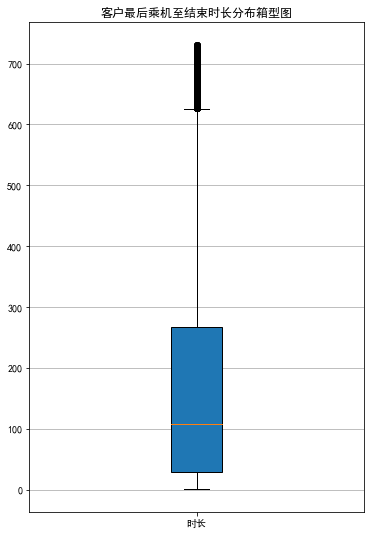

In [8]:
#（2）客户乘机信息分布分析（如最后一次乘机至结束的时长、客户乘机信息中的飞行次数、总飞行公里数等）
user_air_info=data[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
u_time=user_air_info['LAST_TO_END']
plt.figure(figsize=(6,9))
plt.boxplot(u_time,labels=['时长'],patch_artist=True)
plt.grid(axis='y')#显示y坐标轴的底线
plt.title('客户最后乘机至结束时长分布箱型图')
plt.show()
plt.close()


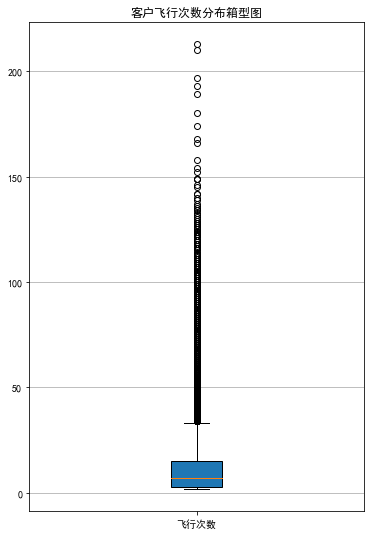

In [9]:
u_sum=user_air_info['FLIGHT_COUNT']
plt.figure(figsize=(6,9))
plt.boxplot(u_sum,labels=['飞行次数'],patch_artist=True)
plt.grid(axis='y')#显示y坐标轴的底线
plt.title('客户飞行次数分布箱型图')
plt.show()
plt.close()

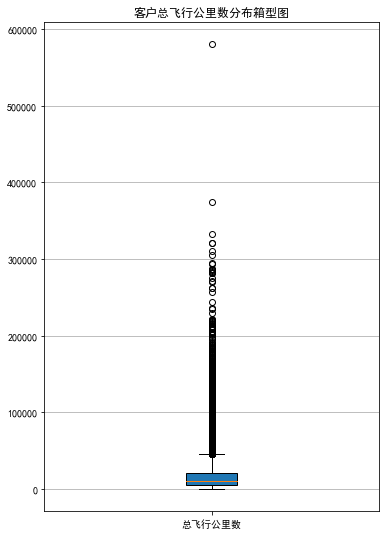

In [10]:
u_km=user_air_info['SEG_KM_SUM']
plt.figure(figsize=(6,9))
plt.boxplot(u_km,labels=['总飞行公里数'],patch_artist=True)
plt.grid(axis='y')#显示y坐标轴的底线
plt.title('客户总飞行公里数分布箱型图')
plt.show()
plt.close()

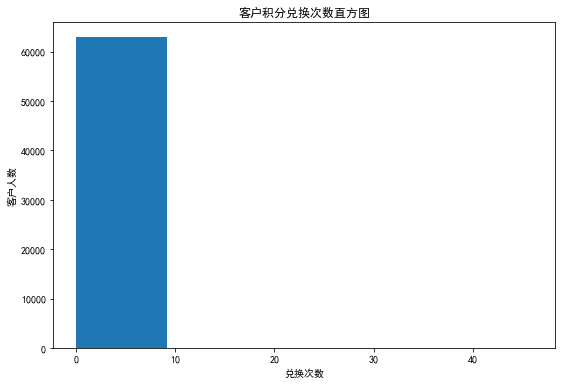

In [11]:
#（3）客户积分信息分布分析（积分兑换次数、总累计积分等）
user_score_info=data[['EXCHANGE_COUNT','Points_Sum']]
u_count=user_score_info['EXCHANGE_COUNT']
# p=pd.value_counts(u_count)查看各兑换次数的人数
plt.figure(figsize=(9,6))
plt.hist(sorted(u_count),bins=5)#bins: 直方图的柱数，即要分的组数，默认为10
plt.xlabel('兑换次数')
plt.ylabel('客户人数')
plt.title("客户积分兑换次数直方图")
plt.show()
plt.close()

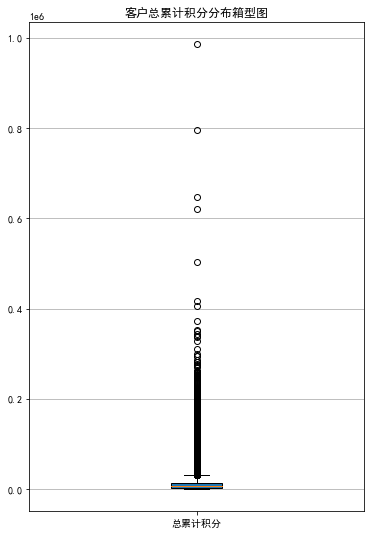

In [12]:
u_points=user_score_info['Points_Sum']
plt.figure(figsize=(6,9))
plt.boxplot(u_points,labels=['总累计积分'],patch_artist=True)
plt.grid(axis='y')#显示y坐标轴的底线
plt.title('客户总累计积分分布箱型图')
plt.show()
plt.close()

In [13]:
# 相关性分析
newdata=mydata[['FFP_DATE','FFP_TIER','AGE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]
newdata['FFP_DATE']=user_basic_info['FFP_DATE']
pearson_coef=newdata.corr(method='pearson')#计算皮尔森相关系数
print('相关性矩阵为：\n',pearson_coef)


相关性矩阵为：
                 FFP_DATE  FFP_TIER       AGE  LAST_TO_END  FLIGHT_COUNT  \
FFP_DATE        1.000000 -0.108238 -0.027905     0.088661     -0.162174   
FFP_TIER       -0.108238  1.000000  0.078532    -0.206763      0.584308   
AGE            -0.027905  0.078532  1.000000    -0.025611      0.073255   
LAST_TO_END     0.088661 -0.206763 -0.025611     1.000000     -0.405143   
FLIGHT_COUNT   -0.162174  0.584308  0.073255    -0.405143      1.000000   
SEG_KM_SUM     -0.175984  0.523503  0.087160    -0.369766      0.851090   
EXCHANGE_COUNT -0.088361  0.342686  0.029571    -0.169798      0.502767   
Points_Sum     -0.152765  0.560187  0.074593    -0.292301      0.748416   

                SEG_KM_SUM  EXCHANGE_COUNT  Points_Sum  
FFP_DATE         -0.175984       -0.088361   -0.152765  
FFP_TIER          0.523503        0.342686    0.560187  
AGE               0.087160        0.029571    0.074593  
LAST_TO_END      -0.369766       -0.169798   -0.292301  
FLIGHT_COUNT      0.851090    

<ipython-input-13-5a6d4a1b2486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['FFP_DATE']=user_basic_info['FFP_DATE']


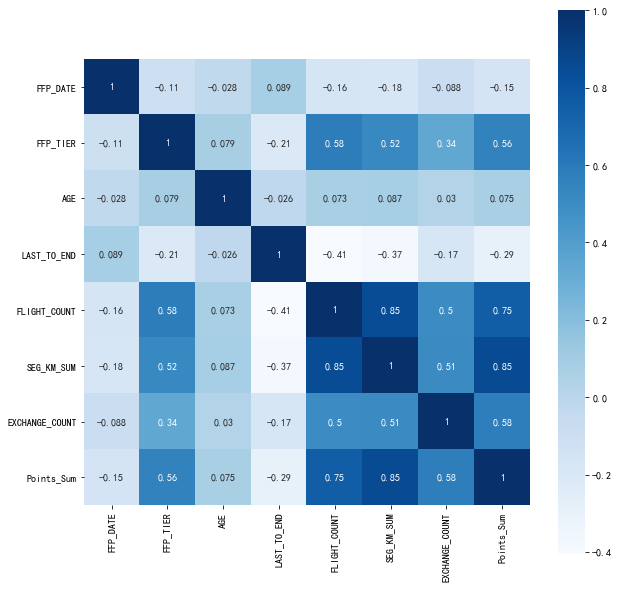

In [14]:
# 绘制热力图
import seaborn as sns
# subplots：创建多个子图
plt.subplots(figsize=(10,10))
# annot：是否显示数值注释
# vmin, vmax:用于指定图例中最小值与最大值的显示值
# square: bool类型参数，是否使热力图的每个单元格为正方形，默认为False
# cmap:指定一个colormap对象，用于热力图的填充色
sns.heatmap(pearson_coef,annot=True,vmax=1,square=True,cmap='Blues')
plt.show()
plt.close()

In [15]:
import pandas as pd 
# 查看是否存在缺失值、异常值
look2=pd.read_csv('look.csv',encoding='gb18030',index_col='col')
look2

,空值数,最大值,最小值
col,,,
MEMBER_NO,0,62988.000000,1.00
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6.000000,4.00
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110.000000,6.00


In [16]:
# old_data=pd.read_csv('air_data.csv',encoding='GB18030')
# # 1.数据清洗
# # (1)去除票价为空的数据
# # (2)去除票价为0的数据
# # (3)去除平均折扣率为0、总飞行公里数为0的数据
# # (4)去除年龄大于100的数据
# data_notnull=old_data[old_data['SUM_YR_1'].notnull()&old_data['SUM_YR_2'].notnull()]
# condition2=(data_notnull['SUM_YR_1']!=0)|(data_notnull['SUM_YR_2']!=0)
# condition3=(data_notnull['avg_discount']!=0)&(data_notnull['SEG_KM_SUM']>0)
# condition4=data_notnull['AGE']<100
# new_data=data_notnull[condition2&condition3&condition4]
# new_data.to_csv('new_data.csv',encoding='gb18030')

# new_data.shape

In [17]:
# 构建 LRFMC 5个指标
new_data=pd.read_csv('new_data.csv',encoding='gb18030')
L=pd.to_datetime(new_data['LOAD_TIME'])-pd.to_datetime(new_data['FFP_DATE'])
# astype 函数用于array中数值类型转换
# Series.str 是把一个series对象转换成一个StringMethods对象（这个对象里面有很多可用的string处理方法）
L=L.astype('str').str.split().str[0]
L=L.astype('int')/30
attr=pd.concat([L,new_data['LAST_TO_END'],new_data['FLIGHT_COUNT'],new_data['SEG_KM_SUM'],new_data['avg_discount']],axis=1)
attr.columns=['L','R','F','M','C']
# attr.to_csv('attr.csv',encoding='gb18030')
attr.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [18]:
# 数据标准化
new_attr=((attr - attr.mean()) / attr.std())
# new_attr.to_csv('new_attr.csv',encoding='gb18030',index=False)
new_attr.head()

,L,R,F,M,C
0,1.440888,-0.944220,14.009909,26.739131,1.297773
1,1.312248,-0.911160,9.057071,13.115407,2.871952
2,1.333491,-0.889120,8.703297,12.642391,2.884739
3,0.663148,-0.415259,0.778757,12.529619,1.997633
4,0.390526,-0.922180,9.906129,13.886680,1.346616


In [19]:
# 构建模型
import pandas as pd
from sklearn.cluster import KMeans #导入KMeans聚类算法库

new_attr=pd.read_csv('new_attr.csv',encoding='gb18030')#导入数据

k = 5  # 聚类的类别

kms = KMeans(n_clusters = k,random_state=1234) # 分为k类，随机种子设为1234
kms.fit(new_attr)  # 开始聚类(模型训练)

label_type = kms.labels_    #获取每个样本点对应的类别
print('各样本的类别标签为：\n',label_type)

type_sum = pd.Series(kms.labels_).value_counts() # 统计各个类别的数目
print('最终每个类别的数目为：\n',type_sum) 

kms_center = pd.DataFrame(kms.cluster_centers_,columns=['L','R','F','M','C'])   # 找出聚类中心
print('各类聚类中心为：\n',kms_center) 

r=pd.Series(['客户群1','客户群2','客户群3','客户群4','客户群5'])
goal=pd.concat([r,type_sum,kms_center],axis=1)
goal.columns=['聚类类别','聚类个数','L','R','F','M','C']
goal

最终每个类别的数目为：
 2    24361
0    15465
3    11945
4     5313
1     4547
dtype: int64
各类聚类中心为：
           L         R         F         M         C
0  1.169120 -0.378150 -0.083839 -0.091149 -0.160000
1  0.017458  0.011758 -0.248559 -0.258038  2.086960
2 -0.697345 -0.416662 -0.159839 -0.158951 -0.266744
3 -0.314498  1.690612 -0.574747 -0.536824 -0.188137
4  0.487213 -0.799465  2.481453  2.421587  0.316119


,聚类类别,聚类个数,L,R,F,M,C
0,客户群1,15465,1.169120,-0.378150,-0.083839,-0.091149,-0.160000
1,客户群2,4547,0.017458,0.011758,-0.248559,-0.258038,2.086960
2,客户群3,24361,-0.697345,-0.416662,-0.159839,-0.158951,-0.266744
3,客户群4,11945,-0.314498,1.690612,-0.574747,-0.536824,-0.188137
4,客户群5,5313,0.487213,-0.799465,2.481453,2.421587,0.316119


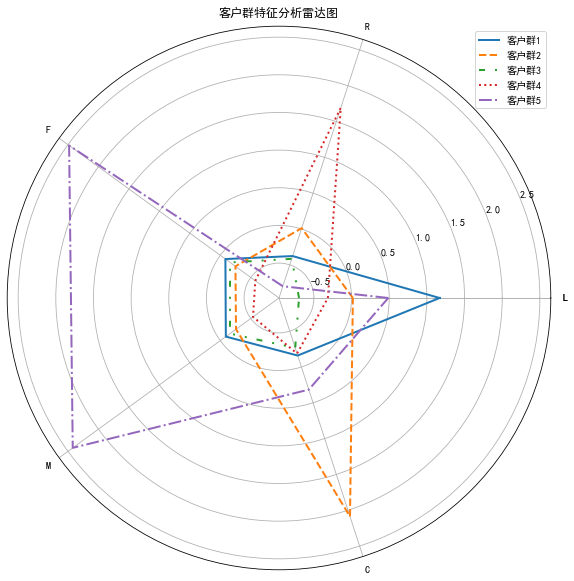

In [20]:
# %matplotlib inline
# 是IPython的魔法函数，可以在IPython编译器里直接使用，
#作用是内嵌画图，省略掉plt.show()这一步，直接显示图像。
# 如果不加这一句的话，我们在画图结束之后需要加上plt.show()才可以显示图像。
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

goal1=goal[['L','R','F','M','C']]

labels=['L','R','F','M','C']

legen=['客户群1','客户群2','客户群3','客户群4','客户群5']

# (0,(3,5,1,5,1,5))->(没有偏移（3pt线、5pt空间、1pt线、5pt空间、1pt线、5pt空间）)
# 这种方法可以实现对线条样式更精细的控制
# 官方文档:https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
lstype=['-','--',(0,(3,5,1,5,1,5)),':','-.']

kinds=list(goal1.iloc[:,0])

#雷达图要保证数据闭合，所以再添加'L'列，并转换成np.ndarray
goal2=pd.concat([goal1,goal1['L']],axis=1)

centers=np.array(goal2.iloc[:,0:])

n=len(labels)
# 作为序列生成器， numpy.linspace()函数用于在线性空间中以均匀步长生成数字序列。
# 0:序列的起始点;2*np.pi:序列的结束点
# n:生成的样本数(这里是生成5个样本数)
# endpoint=False:如果是True，则包括 2*np.pi ；False不包括 2*np.pi
angle=np.linspace(0,2*np.pi,n,endpoint=False)
# numpy.concatenate:合并数组；这里合并的目的是设置闭合数据
angle=np.concatenate((angle,[angle[0]]))
labels.append('L')

fig=plt.figure(figsize=(10,10))
# add_subplot：新建子图
#“111”表示“1x1网格，第一子图”
# 在画布（figure）上绘制极坐标系，polar指极坐标
ax=fig.add_subplot(111,polar=True)

# 1次画一个图，画5次
for i in range(len(kinds)):
    ax.plot(angle,centers[i],linestyle=lstype[i],linewidth=2,label=legen[i])
    
# 1弧度=(180/π)角度
#添加属性标签
ax.set_thetagrids(angle * 180 / np.pi ,labels)

plt.title('客户群特征分析雷达图')
plt.legend()#在图形上添加图例
plt.show()
plt.close()

结合业务分析，通过比较各个特征在群间的大小来对某一个群的特征进行评价分析。其中，客户群2在特征c处的值最大，在特征F、M处的值较小，说明客户群2是偏好乘坐高级舱位的客户群:客户群5在特征F和M上的值最大，且在特征R上的值最小，说明客户群5的会员频繁乘机且近期都有乘机记录;客户群4在特征R处的值最大，在特征L、F、M和C处的值都较小，说明客户群4已经很久没有乘机，是人会时间较短的低价值的客户群;客户群3在所有特征上的值都很小，且在特征L处的值最小，说明客户群3属于新人会员较多的客户群;客户群1在特征L处的值最大，在特征R处的值较小，其他特征值都比较适中，说明客户群1人会时间较长，飞行频率也较高，是有较高价值的客户群。

In [1]:
import pandas as pd 
y1=pd.DataFrame(['客户群5','客户群2','客户群1','客户群3','客户群4'],columns=['客户群'])
y2=pd.DataFrame([1,2,3,4,5],columns=['排名'])
y3=pd.DataFrame(['重要保持客户','重要发展客户','重要挽留客户','一般客户','低价值客户'],columns=['排名含义'])
final=pd.concat([y1,y2,y3],axis=1)
final

,客户群,排名,排名含义
0,客户群5,1,重要保持客户
1,客户群2,2,重要发展客户
2,客户群1,3,重要挽留客户
3,客户群3,4,一般客户
4,客户群4,5,低价值客户
